In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\conno\workspace\projects\diamond_price_prediction\resources\diamonds.csv")

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [7]:
# Select only columns with numerical data types
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix for numerical data
corr_matrix = numerical_data.corr()


## Functions

In [8]:
def corr_heatmap(corr_matrix):
    """"Convient way to initiate a detailed correlation matrix"""


    plt.figure(figsize=(14,12))
    sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                cmap='seismic',
                cbar=True,
                square=True,
                center=0)


In [9]:
def train_model(X, y):
    """Input 'X' and 'y' to build and train model:
    
    X: Categorical variable we'll use to predict our target.
    y: Target variable we are trying to predict"""

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

# Notes about data set
### Three C's
- Cut
- Color
- Clarity
### Other important metrics
- Depth
- Table: top part or flato part
- Price (Target Variable): self explanitor
- x, y, z (Stone Deminsions) **high correlation**
    - 

### It is usually reccomended to drop highly correlated columns / features due to the inherent relation
- Think of the correlation between Sales volume & Units volume

## One Hot Encoding


- One hot encoding is a method used to convert categorical data into a numerical format that can be used by machine learning algorithms. It works by turning each category value into a new column and assigning a 1 or 0 to indicate the presence or absence of that category. For example, if you have a column with the colors "red," "blue," and "green," one hot encoding would create three new columns (one for each color) and use 1s and 0s to show which color is present in each row.

In [10]:
# Encode categorical variables into machine readable values
d_df = pd.get_dummies(df)

## Correlation Matrix

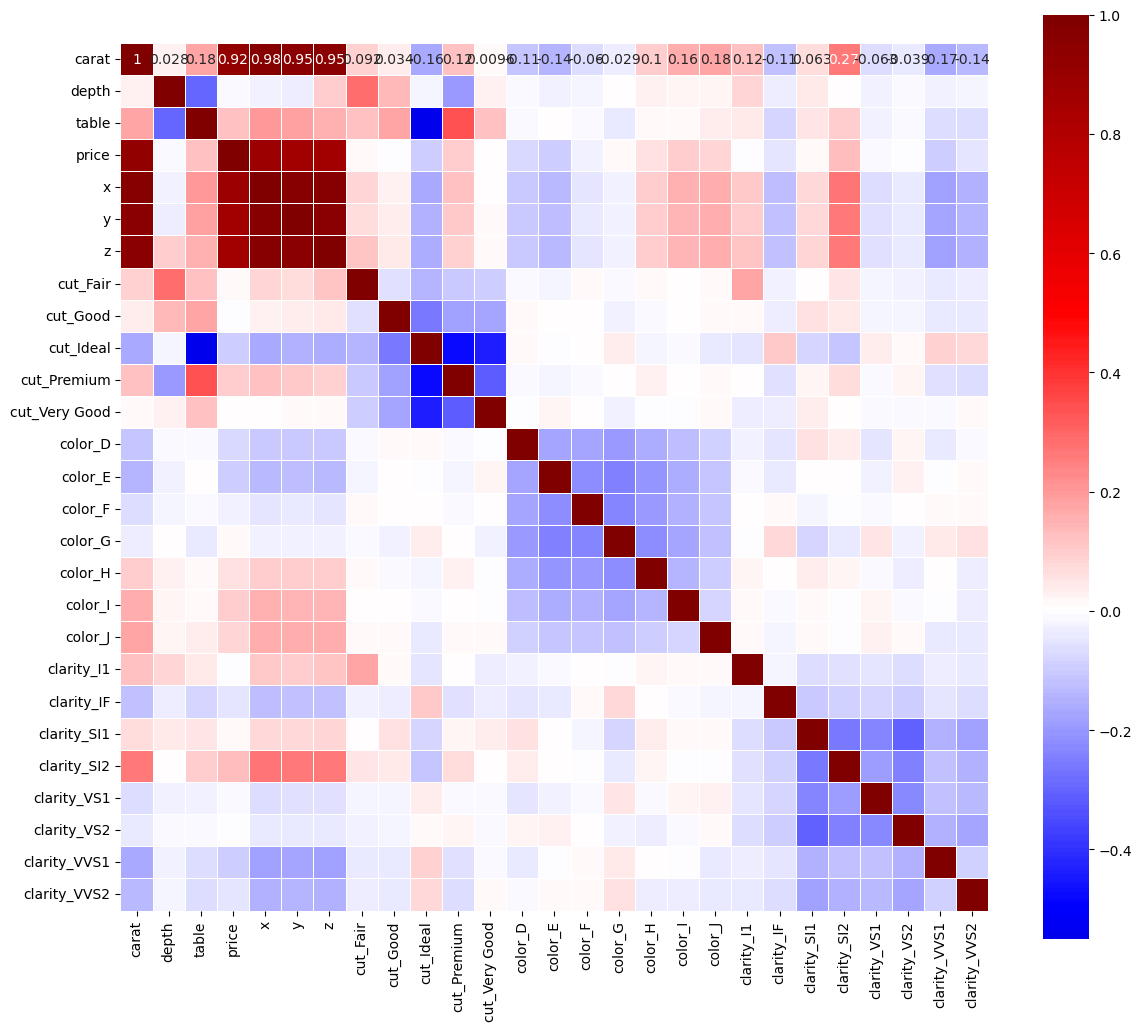

In [12]:
corr_heatmap(d_df.corr())

# Feature Engineering

In [13]:
df['xy'] = df['x']/df['y'] # This creates 7 rows of NaN values that will I'll fill in next block 
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,xy
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.992462
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.013021
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.995086
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.992908
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.997701


In [14]:
df = df.ffill()

## Asigning X, y variable
- The X values are what we will use to predict our y variable.
    - We will drop 'y', build a model using 'X', and then predict 'y', assigning these predictions to a new column named 'predictions'.
    - Once we have the 'predictions' column, we will reintroduce the dropped 'y' variable and evaluate our results.

In [15]:
X = d_df.drop(['price', 'x', 'y', 'z'], axis=1) # Dropping target variable & highly correlated columns
y = d_df['price'] # Target variable

In [16]:
d_df.head() # True & False = 1 & 0

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,True,False,...,False,True,False,False,False,True,False,False,False,False


In [17]:
d_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   x              53940 non-null  float64
 5   y              53940 non-null  float64
 6   z              53940 non-null  float64
 7   cut_Fair       53940 non-null  bool   
 8   cut_Good       53940 non-null  bool   
 9   cut_Ideal      53940 non-null  bool   
 10  cut_Premium    53940 non-null  bool   
 11  cut_Very Good  53940 non-null  bool   
 12  color_D        53940 non-null  bool   
 13  color_E        53940 non-null  bool   
 14  color_F        53940 non-null  bool   
 15  color_G        53940 non-null  bool   
 16  color_H        53940 non-null  bool   
 17  color_I        53940 non-null  bool   
 18  color_

### Feature Names
In order to evaluate the feature weights I need to capture the names of the features before the data is scaled & turned into an array

In [18]:
feature_names = X.columns

In [19]:
# 'Scaler' is a sklearn preproscessing module that normalizes the features of our data.
# 'Normalization' in this context means ajusting the features ('carat', 'cut', 'color', 'clarity', 'depth', 'table', 'xy') so that they have a mean of '0' and standard deviation of 1
s = StandardScaler()
X_scaled = s.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=feature_names)

In [20]:
X_train, X_test, y_train, y_test = train_model(X, y)

In [21]:
# Calculating a baseline
ypred_null = y_train.mean()

# Building Machine Learning Models

In [22]:
def build_reg_models(X_train, y_train):
    """
    Fit the machine learning models on the X_train input features and the y_train target variable.

    Parameters:
        X_train (pandas.DataFrame or numpy.ndarray): The training input features.
        y_train (pandas.Series or numpy.ndarray): The training target variable.

    Returns:
    tuple: A tuple containing the fitted models:
            - knn: Fitted K-Nearest Neighbors regressor.
            - rf: Fitted Random Forest regressor.
            - mlr: Fitted Multiple Linear Regression model.
            - lasso: Fitted Least Absolute Shrinkage and Selection Operator (Lasso) model.
    """

    # knn (KNeighborsRegressor): Instance of the K-Nearest Neighbors regressor.
    knn = KNeighborsRegressor(n_neighbors=7)
    knn.fit(X_train, y_train)

    # rf (RandomForestRegressor): Instance of the Random Forest regressor.
    rf = RandomForestRegressor(n_estimators=10)
    rf.fit(X_train, y_train)

    # mlr (LinearRegression): Instance of the Multiple Linear Regression model.
    mlr = LinearRegression()
    mlr.fit(X_train, y_train)

    # lasso (Lasso): Instance of the Least Absolute Shrinkage and Selection Operator (Lasso) model.
    lasso = Lasso()
    lasso.fit(X_train, y_train)

    return knn, rf, mlr, lasso

In [23]:
knn, rf, mlr, lasso = build_reg_models(X_train, y_train)

In [24]:
y_pred = knn.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = mlr.predict(X_test)
y_pred4 = lasso.predict(X_test)

# Model Evaluation
The random forest regressor model had the lowest 'RMSE' score therby making it the most effective model when trying to predict a diamond's selling price based of the variables trained on. We will use the RF model in our Power BI report.

In [25]:
# Creating a data frame to hold results
rmse_models_eval = pd.DataFrame(index=[':assp'], columns=['RMSE'])

rmse_models_eval.loc['KNN', 'RMSE'] = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_models_eval.loc['RF', 'RMSE'] = np.sqrt(mean_squared_error(y_test, y_pred2))
rmse_models_eval.loc['MLR', 'RMSE'] = np.sqrt(mean_squared_error(y_test, y_pred3))
rmse_models_eval.loc['Lasso', 'RMSE'] = np.sqrt(mean_squared_error(y_test, y_pred4))
rmse_models_eval.loc['Null', 'RMSE'] = ypred_null

In [26]:
rmse_models_eval

,RMSE
:assp,NaN
KNN,1068.130872
RF,577.735839
MLR,1159.515284
Lasso,1159.526848
Null,3939.490707


In [27]:
# Creating a data frame to hold results
r2_models_eval = pd.DataFrame(index=['Lasso'], columns=['R2'])

r2_models_eval.loc['KNN', 'R2'] = r2_score(y_test, y_pred)
r2_models_eval.loc['RF', 'R2'] = r2_score(y_test, y_pred2)
r2_models_eval.loc['MLR', 'R2'] = r2_score(y_test, y_pred3)
r2_models_eval.loc['Lasso', 'R2'] = r2_score(y_test, y_pred4)

In [28]:
r2_models_eval

,R2
Lasso,0.915423
KNN,0.928231
RF,0.979003
MLR,0.915425


In [29]:
feature_importances = pd.DataFrame(rf.feature_importances_, 
                                   index=feature_names, 
                                   columns=['importance']).sort_values('importance', ascending=False)

In [30]:
feature_importances

,importance
carat,0.882239
clarity_SI2,0.020038
clarity_I1,0.017854
clarity_SI1,0.015705
color_J,0.010445
depth,0.008171
clarity_VS2,0.007579
color_I,0.007576
color_H,0.005975
clarity_VS1,0.005924


In [31]:
def plot_model(price, price_prediction):

    # Enhanced plotting actual vs predicted values with a reference line
    plt.figure(figsize=(12, 8))

    # Using a color map to indicate density
    sns.scatterplot(x=price, y=price_prediction, palette='viridis', alpha=0.6, s=100, edgecolor=None)

    # Perfect prediction line
    plt.plot([price.min(), price.max()], [price.min(), price.max()], color='red', lw=2, linestyle='--', label='Perfect Prediction Line')

    # Adding axis labels and title with enhanced formatting
    plt.xlabel('Actual Price', fontsize=14, fontweight='bold')
    plt.ylabel('Predicted Price', fontsize=14, fontweight='bold')
    plt.title('Actual vs Predicted Price', fontsize=16, fontweight='bold')

    # Adding a legend
    plt.legend()

    # Improving plot aesthetics
    sns.despine(trim=True)


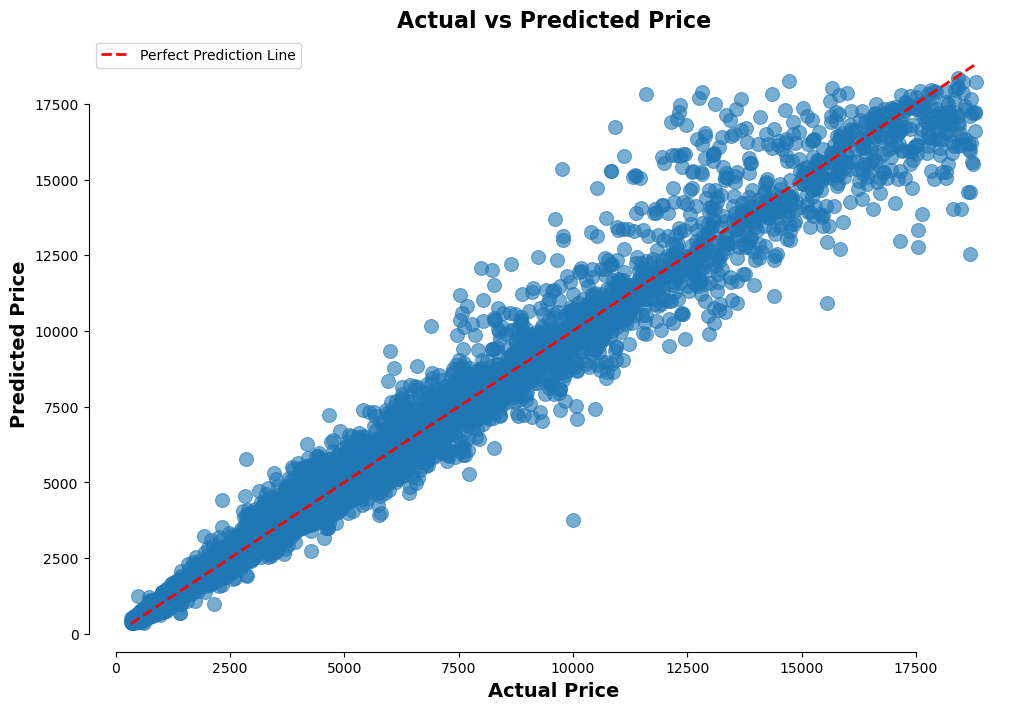

In [32]:
plot_model(y_test, y_pred2)

In [33]:
def plot_features(feature_importances):
    
    # Plotting feature importances
    plt.figure(figsize=(12, 6))
    sns.barplot(x=feature_importances.index, y=feature_importances['importance'])
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature Importances')
    plt.xticks(rotation=90)


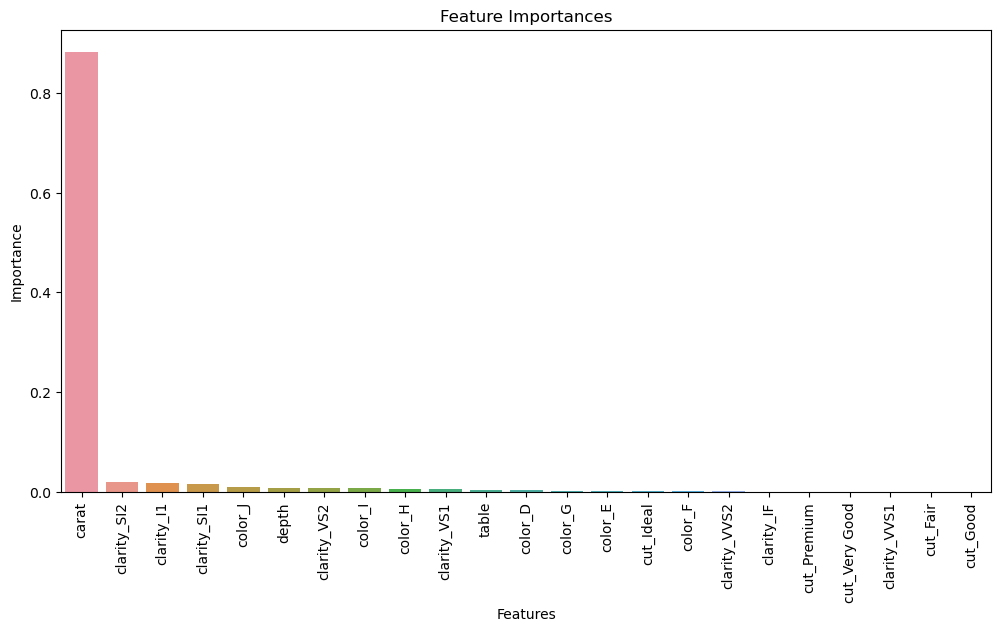

In [34]:
plot_features(feature_importances)

# Exporting Model

In [35]:
# Save ML model to disk
import pickle
import os

# Directory path and file names
directory_path = r"C:\Users\conno\workspace\projects\diamond_price_prediction\resources"
model_file_name = 'random_forest_model.pkl'
scaler_file_name = 'scaler.pkl'
processed_data_file_name = 'processed_diamond_data.csv'

# Full paths
model_full_path = os.path.join(directory_path, model_file_name)
scaler_full_path = os.path.join(directory_path, scaler_file_name)
data_full_path = os.path.join(directory_path, processed_data_file_name)

# Save ML model to disk
with open(model_full_path, 'wb') as model_file:
    pickle.dump(rf, model_file)

with open(scaler_full_path, 'wb') as scaler_file:
    pickle.dump(s, scaler_file)

# Saving the processed data as a csv
df.to_csv(data_full_path, index=False)

In [36]:
df['predictions'] = rf.predict(X)

In [37]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,xy,predictions
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.992462,456.500000
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.013021,326.000000
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.995086,356.200000
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.992908,388.450000
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.997701,398.626667
